# Final Project: Foundation of Data Science

Contributors :

1] Suyash Yogesh Soniminde (sys8910)

2] Kumar Ayush (ka3095)

3] Ran Xu (rx523)

--------------------------------------------------------------------------

# 1) Identify a question/estimand

 How do lifestyle and behaviour factors affect obesity risk?

===========================================================

 Dataset :- https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

Description of dataset : This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

Any scaling/transformations performed on the data :

the following scaling and transformations have been performed on the dataset:

-----------------------------------------------------------------

Encoding Categorical Variables:

The CAEC column, which represents eating habits, was converted from categorical text values ('no', 'Sometimes', 'Frequently', 'Always') to integer values (0, 1, 2, 3) respectively. This transformation turns categorical text data into a numeric format that can be used in statistical models.
The NObeyesdad column, indicating obesity levels, was transformed from categorical text values (e.g., 'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', etc.) to a range of integer values (0 to 6). :----

('Insufficient_Weight':0,'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4,'Overweight_Level_I':5,'Overweight_Level_II':6})

-----------------------------------------------------------------


Standardizing Continuous Variables:

The Age column was standardized by subtracting the mean and dividing by the standard deviation. Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This was done to normalize the scale of continuous variables.


Similarly, the FAF column, which represents physical activity frequency, was standardized using the same approach as Age.

-----------------------------------------------------------------

By encoding categorical variables and standardizing continuous variables, we have ensured that the data is made more uniform and suitable for our further statistical analysis. 

===========================================================

# 2) Describe a scientific/causal model

Proposed DAG :-

The CAEC represents ‘Consumption of food between meals’. 
The FAF represents ‘Physical activity frequency’.
And OL represents the NObeyesdad (Obesity level classification) 

<img src="image-20231211-230407.png" width="" align="" />


FAF and CAEC -> predictors. Age->confound. OL is the outcome variable.

# 3) Define a corresponding statistical model

Our proposed statistical model:


Ordered Logistic Regression Model 


Let's denote:
- OL_i as the Obesity Level for the i^th individual,
- FAF_i as the Physical Activity Frequency for the i^th individual,
- CAEC_i as the Consumption of food between meals for the i^th individual,
- Age_i as the Age for the i^th individual.

The model is :

OL_i ~ OrderedLogit(ϕ_i, α)

Where:

- OL_i is the Obesity Level for the i^th individual.
- ϕ_i is the predictor for the i^th individual, defined as:

  ϕ_i = β_FAF · FAF_i + β_CAEC · Δ(CAEC_i) + β_Age · Age_i

  Here:
  - β_FAF, β_CAEC, and β_Age are the coefficients for Physical Activity Frequency, Consumption of food between meals, and Age, respectively.
  - FAF_i is the Physical Activity Frequency for the i^th individual.
  - CAEC_i is the Consumption of Food Between Meals for the i^th individual.
  - Age_i is the Age for the i^th individual.
  - Δ(CAEC_i) represents the cumulative sum of the Dirichlet distributed variable δ, indexed by CAEC_i.

- α represents the cutpoints for the ordinal logistic regression.

Priors are :

1] β_age ~ Normal(0.2, 1)

2] β_FAF ~ Normal(-0.2, 1)

3] β_CAEC ~ Normal(-0.1, 1)

4] α_j ~ Normal(0, 1)


# 4) Validate the model on simulated data with known parameter values

we generate simulated data and then validate our model on that by checking for the true beta know values we define earlier and the ones we get after running the model on simulated data and sampling its posterior distribution.

In [1]:
!pip install pymc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.2/472.2 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.5/819.5 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cons: filename=cons-0.4.6-py3-none-any.whl size=9098 sha256=dd6ec36cc3c556f376f55f94813cb721ae382c00c0de3b63a17dae5d84ccf0ee
  Stored in directory: /root/.cache/pip/wheels/56/8

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import logistic

# Function for one-hot encoding
def one_hot_encode(array, num_categories):
    return np.eye(num_categories)[array]

# Set seed for reproducibility
RANDOM_SEED = 8927
np.random.seed(365)

# Number of samples
n = 1000

# Simulate 'FAF' as a continuous variable with values between 0 and 3
sim_FAF = np.random.uniform(0, 3, size=n)

# Simulate 'CAEC' as categorical variables with 4 levels
sim_CAEC = np.random.choice([0, 1, 2, 3], size=n, p=[0.84, 0.11, 0.03, 0.02])

# One-hot encode 'sim_CAEC'
sim_CAEC_encoded = one_hot_encode(sim_CAEC, 4)

# Simulate 'Age' and normalize it
age_mean = 24.31
age_std = 6.35
sim_Age = np.random.normal(age_mean, age_std, n)
sim_Age_normalized = (sim_Age - np.mean(sim_Age)) / np.std(sim_Age)

# True beta coefficients for FAF, CAEC, and Age
beta_FAF = -0.25 
beta_CAEC = np.array([-0.05, -0.1, -0.15, -0.2])  
beta_Age = 0.25 

# Define cutpoints for 7 categories of Obesity Level
cutpoints = [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5]

# Compute predictor
phi = beta_FAF * sim_FAF + np.dot(sim_CAEC_encoded, beta_CAEC) + beta_Age * sim_Age_normalized

# Convert predictor to probabilities and simulate outcome
probabilities = 1-logistic.cdf(cutpoints - phi[:, None])
sim_OL = np.array([np.sum(p > np.random.rand()) for p in probabilities])

In [3]:
type(sim_OL)

numpy.ndarray

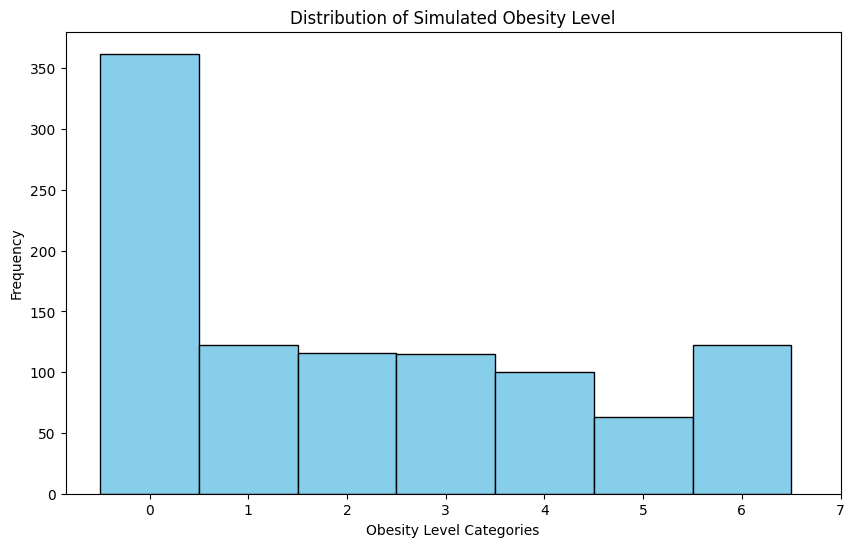

In [4]:
import matplotlib.pyplot as plt
# Plotting the distribution of sim_OL
plt.figure(figsize=(10, 6))
plt.hist(sim_OL, bins=range(8), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Obesity Level Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated Obesity Level')
plt.xticks(range(8))
plt.show()

In [5]:
# Importing necessary libraries
import pymc as pm
import pytensor.tensor as pt

# Initializing variables from previous simulation
A = sim_Age_normalized
C = sim_CAEC
F = sim_FAF
O = sim_OL

# Create a Bayesian model using PyMC
with pm.Model() as mRXE:
    # Defining priors for the alpha coefficients for the 6 categories
    alpha = pm.Normal(
        "alpha",  # Name of the variable
        0.0,      # Mean of the normal distribution
        1,        # Standard deviation
        shape=6,  # Number of categories
        testval=np.arange(6),  # Initial test values
    )

    # Defining priors for the coefficients of Age, CAEC, and FAF
    bA = pm.Normal("bA", 0.2, 1)  # Coefficient for Age
    bC = pm.Normal("bC", -0.1, 1) # Coefficient for CAEC
    bF = pm.Normal("bF", -0.2, 1) # Coefficient for FAF
     

    
    # Defining a Dirichlet distribution for delta
    delta = pm.Dirichlet("delta", np.repeat(8.0, 3), shape=3)
    delta_j = pt.concatenate([pt.zeros(1), delta])  # Concatenate delta with a leading zero
    delta_j_cumulative = pt.extra_ops.cumsum(delta_j)  # Cumulative sum of delta values

    # Calculating the predictor phi
    phi = bC * delta_j_cumulative[C] + bF * F  + bA * A 

    # Defining the Ordered Logistic for the observed data
    resp_obs = pm.OrderedLogistic("resp_obs", phi, alpha, observed=O)

    # Sampling from the posterior distribution
    idata_RXE = pm.sample(1000, tune=2000, random_seed=RANDOM_SEED)

# Summarizing the posterior distribution of the parameters
pm.summary(idata_RXE, var_names=["bC", "bF", "bA", "alpha", "delta"], round_to=2)


/root/venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/root/venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/tmp/ipykernel_86/2381072452.py:14: FutureWarning: The `testval` argument is deprecated; use `initval`.
  alpha = pm.Normal(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUT

Sampling 2 chains for 2_000 tune and 1_000 draw iterations (4_000 + 2_000 draws total) took 189 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bC,-0.03,0.28,-0.55,0.54,0.01,0.01,1986.13,1252.89,1.00
bF,-0.26,0.06,-0.38,-0.14,0.00,0.00,640.87,854.65,1.01
bA,0.22,0.06,0.12,0.32,0.00,0.00,2245.98,1371.34,1.00
alpha[0],-0.98,0.12,-1.19,-0.77,0.00,0.00,577.36,907.75,1.01
alpha[1],-0.47,0.11,-0.69,-0.26,0.00,0.00,549.94,906.76,1.01
alpha[2],0.01,0.11,-0.22,0.20,0.00,0.00,543.35,793.82,1.01
alpha[3],0.54,0.11,0.33,0.75,0.00,0.00,551.58,825.22,1.01
alpha[4],1.10,0.12,0.89,1.34,0.00,0.00,615.48,908.83,1.00
alpha[5],1.60,0.13,1.35,1.84,0.00,0.00,692.82,1114.07,1.00
delta[0],0.33,0.09,0.17,0.52,0.00,0.00,1718.37,1513.19,1.00


In [6]:
import numpy as np


# Calculating the individual differences
individual_differences = np.diff(delta_j_cumulative.eval())
bCI=-0.03*individual_differences
bCI

array([-0.00966306, -0.0133259 , -0.00701105])

As we can observe:

true beta Age = 0.25, observed beta Age(mean) = 0.22

-----------------------------------------------------------

true beta FAF = -0.25, observed beta FAF(mean) = -0.26

-----------------------------------------------------------

true beta CAEC values are an array of :- [-0.05, -0.1, -0.15, -0.2]

observed beta CAEC value(maximum effect
 of CEAC) = -0.03 with a standard deviation of 0.28

For CAEC the bCI values we calculated give us a measure of how changes in the CAEC level  affects the obesity level. Interpreting this with the general sense of our true CAEC values that we had chosen before, this contributes more in the direction of our model being validated.

-----------------------------------------------------------

Thus the beta values after running the simulated data on our model and sampling its posterior values are close to the known true beta values we consider at the start.

Thus we can strongly say that our model is now validated.

------------------------------------------------------------

# 5) Analyze the real data


Read the clean real data

In [7]:
!pip install pymc


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import numpy as np
import pymc as pm
import pandas as pd
df = pd.read_csv("ObesityDataSet.csv", sep=",")
df['CAEC'] = df['CAEC'].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight':0,'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4,'Overweight_Level_I':5,'Overweight_Level_II':6})
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['FAF'] = (df['FAF'] - df['FAF'].mean()) / df['FAF'].std()

## A) Answering the estimand

In [9]:
# Importing necessary libraries
import pymc as pm
import pytensor.tensor as pt

RANDOM_SEED = 8927

A = df['Age']
C = df['CAEC']
F = df['FAF']
O = df['NObeyesdad']

with pm.Model() as mRXE:
    alpha = pm.Normal(
        "alpha",
        0.0,
        1,
        shape=6,
        testval=np.arange(6),
    )
    bA = pm.Normal("bA", 0.2, 1) 
    bC = pm.Normal("bC", -0.1, 1) 
    bF = pm.Normal("bF", -0.2, 1)
    
    delta = pm.Dirichlet("delta", np.repeat(8.0, 3), shape=3)
    delta_j = pt.concatenate([pt.zeros(1), delta])
    delta_j_cumulative = pt.extra_ops.cumsum(delta_j)
    
    phi = bC * delta_j_cumulative[C] + bF * F  + bA * A 
    resp_obs = pm.OrderedLogistic("resp_obs", phi, alpha, observed=O)
    idata_RXE = pm.sample(2000, tune=2000, random_seed=RANDOM_SEED)
pm.summary(idata_RXE, var_names=["bC", "bF", "bA", "alpha", "delta"], round_to=2)

/tmp/ipykernel_86/2459726286.py:14: FutureWarning: The `testval` argument is deprecated; use `initval`.
  alpha = pm.Normal(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, bA, bC, bF, delta]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 467 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bC,-2.87,0.21,-3.27,-2.46,0.01,0.0,1245.32,1773.97,1.00
bF,-0.16,0.04,-0.23,-0.09,0.00,0.0,3354.52,2508.70,1.00
bA,0.37,0.04,0.29,0.45,0.00,0.0,3082.26,2799.28,1.00
alpha[0],-3.10,0.17,-3.43,-2.78,0.01,0.0,940.69,1554.01,1.00
alpha[1],-1.97,0.16,-2.26,-1.65,0.01,0.0,872.51,1458.82,1.00
alpha[2],-1.04,0.16,-1.34,-0.75,0.01,0.0,834.09,1244.04,1.00
alpha[3],-0.40,0.16,-0.71,-0.13,0.01,0.0,810.96,1350.21,1.01
alpha[4],0.31,0.16,0.02,0.60,0.01,0.0,816.68,1384.39,1.00
alpha[5],1.20,0.16,0.90,1.50,0.01,0.0,862.96,1377.39,1.00
delta[0],0.21,0.04,0.12,0.28,0.00,0.0,899.78,1526.83,1.00


In [10]:
import numpy as np


# Calculating the individual differences
individual_differences = np.diff(delta_j_cumulative.eval())
bCI=-2.87*individual_differences
bCI

array([-1.1447752 , -0.78031884, -0.94490597])

bC: maximum effect
 of CEAC

For CAEC the bCI values we calculated give us a measure of how changes in the CAEC level  affects the change in obesity level. as we can see there is a negative correlation so an increase in CAEC level (healthy food between meals) reduces the chances of being in higher obesity levels. The exact values of bCI give us a measure of how much effect is happening across different category changes. 

bF: Higher physical activity frequency is associated with lower log-odds of higher obesity levels.

bA: As age increases, the log-odds of higher obesity levels also increase.

So from this we can conclude that an increase in age correlates to an increase in obesity level. 

-------------------------------------------------------------------------------

Answering the question our estimand is asking ,we can say that,

behavioral factor(FAF)(Physical activity frequency) correlates negatively to an increase in obesity level. 

And the lifestyle factor(CAEC)(Consumption of food between meals) correlates negatively to an increase in obesity level.

Based on this, our policy recommendation would be that an increase in physical activity and consumption of healthy foods between meals should be strongly advocated so that we can reduce the obesity problem.

-------------------------------------------------------------------------------

### B) Performing additional analysis

Total effect of Age on Obesity Level.

In [11]:
# Importing necessary libraries
import pymc as pm
import pytensor.tensor as pt

RANDOM_SEED = 8927

A = df['Age']
C = df['CAEC']
F = df['FAF']
O = df['NObeyesdad']

with pm.Model() as mRXE:
    alpha = pm.Normal(
        "alpha",
        0.0,
        1,
        shape=6,
        testval=np.arange(6),
    )
    bA = pm.Normal("bA", 0.2, 1) 
    
    phi = bA * A 
    resp_obs = pm.OrderedLogistic("resp_obs", phi, alpha, observed=O)
    idata_RXE = pm.sample(2000, tune=2000, random_seed=RANDOM_SEED)
pm.summary(idata_RXE, var_names=[ "bA", "alpha"], round_to=2)

/tmp/ipykernel_86/3011796243.py:14: FutureWarning: The `testval` argument is deprecated; use `initval`.
  alpha = pm.Normal(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, bA]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 148 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bA,0.46,0.04,0.38,0.54,0.0,0.0,3174.95,3155.40,1.0
alpha[0],-1.96,0.07,-2.08,-1.83,0.0,0.0,2404.65,2706.43,1.0
alpha[1],-1.02,0.05,-1.11,-0.93,0.0,0.0,1952.44,2288.07,1.0
alpha[2],-0.23,0.04,-0.31,-0.14,0.0,0.0,1633.37,2036.07,1.0
alpha[3],0.34,0.05,0.25,0.42,0.0,0.0,1849.85,2387.57,1.0
alpha[4],1.01,0.05,0.93,1.11,0.0,0.0,2037.42,2558.49,1.0
alpha[5],1.90,0.06,1.78,2.01,0.0,0.0,2435.60,3039.54,1.0


Direct Effect of Age on Obesity Level.

In [12]:
A = df['Age']
C = df['CAEC']
F = df['FAF']
O = df['NObeyesdad']

with pm.Model() as mRXE:
    alpha = pm.Normal(
        "alpha",
        0.0,
        1,
        shape=6,
        testval=np.arange(6),
    )
    bA = pm.Normal("bA", 0.2, 1,shape = 4)
    bF = pm.Normal("bF", -0.2, 1,shape = 4)

    phi =  bF[C] * F  + bA[C] * A 
    resp_obs = pm.OrderedLogistic("resp_obs", phi, alpha, observed=O)
    idata_RXE = pm.sample(2000, tune=2000, random_seed=RANDOM_SEED)
pm.summary(idata_RXE, var_names=[ "bF", "bA", "alpha"], round_to=2)

/tmp/ipykernel_86/1653707827.py:8: FutureWarning: The `testval` argument is deprecated; use `initval`.
  alpha = pm.Normal(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [alpha, bA, bF]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 180 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
bF[0],-1.07,0.33,-1.66,-0.44,0.0,0.0,7617.81,3322.70,1.0
bF[1],-0.18,0.04,-0.26,-0.10,0.0,0.0,7283.14,3281.22,1.0
bF[2],-0.11,0.12,-0.34,0.11,0.0,0.0,8928.74,3036.79,1.0
bF[3],-0.44,0.18,-0.78,-0.11,0.0,0.0,6382.14,3118.98,1.0
bA[0],-1.26,0.40,-2.04,-0.57,0.0,0.0,6326.79,3381.25,1.0
bA[1],0.34,0.04,0.25,0.42,0.0,0.0,7050.66,3179.68,1.0
bA[2],2.16,0.19,1.80,2.51,0.0,0.0,3773.99,2786.96,1.0
bA[3],0.31,0.25,-0.17,0.77,0.0,0.0,6160.57,2576.03,1.0
alpha[0],-2.16,0.07,-2.30,-2.03,0.0,0.0,2548.43,2670.09,1.0
alpha[1],-1.14,0.05,-1.24,-1.04,0.0,0.0,1937.82,2719.99,1.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=92a8fb55-5d6e-4e3b-8844-ce78d0661321' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>